# **Importing Required Libraries**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import math

# **Defining the XGBoost Parameters**

In [2]:
# Train individual models using XGBoost
xgb_params = {
    'objective': 'reg:squarederror',
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42
}

# Train models for each component
model = xgb.XGBRegressor(**xgb_params)

**Defining the Global Variables**

In [3]:
dates = pd.date_range(start='2022-01-01', end='2023-12-31', freq='D')
num_regions = 730
target = 'units_sold'

# **Generating Data and Training Individual Models**

> **Historical Sales Data Generation**

In [4]:
# Generate random historical sales data
historical_sales_data = pd.DataFrame({
    'date': dates,
    'units_sold': np.random.randint(100, 1000, len(dates))
})

# Split data into training and validation sets
train_data_h, val_data_h = train_test_split(historical_sales_data, test_size=0.2, random_state=42)

In [5]:
print(historical_sales_data)

          date  units_sold
0   2022-01-01         532
1   2022-01-02         248
2   2022-01-03         178
3   2022-01-04         643
4   2022-01-05         457
..         ...         ...
725 2023-12-27         186
726 2023-12-28         227
727 2023-12-29         457
728 2023-12-30         275
729 2023-12-31         302

[730 rows x 2 columns]


> **Generating Sentiment Score Data for News: NLP**

In [6]:
# Generate random data for news sentiment
news_sentiment_data = pd.DataFrame({
    'date': dates,
    'sentiment_score': np.random.uniform(0, 1, len(dates))
})
train_data_nlp, val_data_nlp = train_test_split(news_sentiment_data, test_size=0.2, random_state=42)

In [7]:
print(news_sentiment_data)

          date  sentiment_score
0   2022-01-01         0.368227
1   2022-01-02         0.243123
2   2022-01-03         0.040596
3   2022-01-04         0.846876
4   2022-01-05         0.570901
..         ...              ...
725 2023-12-27         0.550972
726 2023-12-28         0.114587
727 2023-12-29         0.109807
728 2023-12-30         0.517364
729 2023-12-31         0.207808

[730 rows x 2 columns]


>**Training the Model**

In [8]:
nlp_model =  model.fit(train_data_nlp['sentiment_score'], train_data_h['units_sold'])
nlp_predictions = nlp_model.predict(val_data_nlp[['sentiment_score']])

mae_nlp = mean_absolute_error(val_data_h['units_sold'], nlp_predictions)

print(f"MAE for NLP model: {mae_nlp}")

MAE for NLP model: 230.09320089261826


> **Generating Weather Data**

In [9]:
# Generate random weather data
weather_data = pd.DataFrame({
    'date': dates,
    'temperature': np.random.uniform(10, 35, len(dates)),
    'humidity': np.random.uniform(30, 80, len(dates)),
    'rainfall': np.random.uniform(0, 10, len(dates))
    })
train_data_wd, val_data_wd = train_test_split(weather_data, test_size=0.2, random_state=42)

In [10]:
print(weather_data)

          date  temperature   humidity  rainfall
0   2022-01-01    15.206087  47.608276  9.822919
1   2022-01-02    32.329441  51.717235  8.614019
2   2022-01-03    31.857903  60.254725  2.177196
3   2022-01-04    25.643145  30.201931  4.851575
4   2022-01-05    18.884396  56.291954  2.679619
..         ...          ...        ...       ...
725 2023-12-27    11.819638  48.909548  9.257881
726 2023-12-28    18.423578  53.541804  4.153854
727 2023-12-29    23.731321  40.631877  1.078325
728 2023-12-30    28.268304  45.960687  2.807507
729 2023-12-31    26.236822  33.625006  5.628215

[730 rows x 4 columns]


> **Training the Model**

In [11]:
wd_model =  model.fit(train_data_wd[['temperature', 'humidity', 'rainfall']], train_data_h['units_sold'])
wd_predictions = wd_model.predict(val_data_wd[['temperature', 'humidity', 'rainfall']])

mae_wd = mean_absolute_error(val_data_h['units_sold'], wd_predictions)

print(f"MAE for NLP model: {mae_wd}")

MAE for NLP model: 220.29734112465218


> **Generating Population Data**

In [12]:
# Generate random population data

population_data = pd.DataFrame({
    'region': [f"region{i}" for i in range(1, num_regions + 1)],
    'urban_population': np.random.uniform(0.4, 0.9, 730),
    'rural_population': np.random.uniform(0.1, 0.6, 730)
})


train_data_pop, val_data_pop = train_test_split(population_data, test_size=0.2, random_state=42)

In [13]:
print(population_data)

        region  urban_population  rural_population
0      region1          0.819183          0.359314
1      region2          0.658958          0.232727
2      region3          0.402549          0.569803
3      region4          0.831894          0.249969
4      region5          0.440624          0.499806
..         ...               ...               ...
725  region726          0.585481          0.202952
726  region727          0.878501          0.254565
727  region728          0.746889          0.208270
728  region729          0.843322          0.112452
729  region730          0.433775          0.561783

[730 rows x 3 columns]


> **Training the Model**

In [14]:
# Train population model

pop_model = model.fit(train_data_pop[['urban_population', 'rural_population']], train_data_h['units_sold'])
population_predictions = pop_model.predict(val_data_pop[['urban_population', 'rural_population']])
mae_pop = mean_absolute_error(val_data_h['units_sold'], population_predictions)
print(f"MAE for Population model: {mae_pop}")

MAE for Population model: 238.3492155728275


> **Generating the Population Data: Urban and Rural**

In [15]:
# Generate random geography data
geography_data = pd.DataFrame({
    'region': [f"region{i}" for i in range(1, num_regions + 1)],
    'geography_type': np.random.choice(['Hilly', 'Plain', 'Grassland'], 730)
})


train_data_geo, val_data_geo = train_test_split(geography_data, test_size=0.2, random_state=42)

> One Hot Encoding

In [16]:
label_encoder = LabelEncoder()
train_data_geo['geography_type_encoded'] = label_encoder.fit_transform(train_data_geo['geography_type'])
val_data_geo['geography_type_encoded'] = label_encoder.transform(val_data_geo['geography_type'])

> **Traiing the Model**

In [17]:
# train_data_geo_encoded = pd.get_dummies(train_data_geo, columns=['geography_type'], prefix=['geography'])
# val_data_geo_encoded = pd.get_dummies(val_data_geo, columns=['geography_type'], prefix=['geography'])

geo_model = model.fit(train_data_geo[['geography_type_encoded']], train_data_h['units_sold'])
geography_predictions = geo_model.predict(val_data_geo[['geography_type_encoded']])
mae_geo = mean_absolute_error(val_data_h['units_sold'], geography_predictions)
print(f"MAE for Geography model: {mae_geo}")

MAE for Geography model: 228.27754065108627


In [18]:
print(train_data_geo)

        region geography_type  geography_type_encoded
247  region248          Plain                       2
335  region336          Plain                       2
702  region703      Grassland                       0
440  region441      Grassland                       0
136  region137      Grassland                       0
..         ...            ...                     ...
71    region72          Plain                       2
106  region107          Hilly                       1
270  region271      Grassland                       0
435  region436          Plain                       2
102  region103          Hilly                       1

[584 rows x 3 columns]


> **Generating Stock Closing Prices**

In [19]:
# Generate random stock price data
stock_price_data = pd.DataFrame({
    'date': dates,
    'closing_price': np.random.uniform(40, 60, len(dates))
})

train_data_sp, val_data_sp = train_test_split(stock_price_data, test_size=0.2, random_state=42)

In [20]:
print(stock_price_data)

          date  closing_price
0   2022-01-01      59.855912
1   2022-01-02      56.007816
2   2022-01-03      56.004593
3   2022-01-04      42.292404
4   2022-01-05      54.568175
..         ...            ...
725 2023-12-27      51.949378
726 2023-12-28      50.071143
727 2023-12-29      43.319994
728 2023-12-30      47.163814
729 2023-12-31      51.561828

[730 rows x 2 columns]


> **Training the Model**

In [21]:
# Train stock price model
sp_model = model.fit(train_data_sp[['closing_price']], train_data_h['units_sold'])
stock_price_predictions = sp_model.predict(val_data_sp[['closing_price']])
mae_sp = mean_absolute_error(val_data_h['units_sold'], stock_price_predictions)
print(f"MAE for stock price model: {mae_sp}")

MAE for stock price model: 222.69002062653843


> **Generating Customer Feedback Data**

In [22]:
feedback_data = pd.DataFrame({
    'date': dates,
    'product_id':[f"AB001"for i in range(1, num_regions + 1)],
    'customer_feedback': np.random.choice(['Positive', 'Negative', 'Neutral'], 730)
})
train_data_fd, val_data_fd = train_test_split(feedback_data, test_size=0.2, random_state=42)

One Hot Encoding

In [23]:
label_encoder = LabelEncoder()
train_data_fd['feedback_encoded'] = label_encoder.fit_transform(train_data_fd['customer_feedback'])
val_data_fd['feedback_encoded'] = label_encoder.transform(val_data_fd['customer_feedback'])

In [24]:
print(train_data_fd)

          date product_id customer_feedback  feedback_encoded
247 2022-09-05      AB001          Positive                 2
335 2022-12-02      AB001           Neutral                 1
702 2023-12-04      AB001           Neutral                 1
440 2023-03-17      AB001          Negative                 0
136 2022-05-17      AB001           Neutral                 1
..         ...        ...               ...               ...
71  2022-03-13      AB001          Positive                 2
106 2022-04-17      AB001           Neutral                 1
270 2022-09-28      AB001          Positive                 2
435 2023-03-12      AB001          Positive                 2
102 2022-04-13      AB001          Positive                 2

[584 rows x 4 columns]


> **Training the Model**

In [25]:
fd_model = model.fit(train_data_fd[['feedback_encoded']], train_data_h['units_sold'])
feedback_predictions = fd_model.predict(val_data_fd[['feedback_encoded']])
mae_fd = mean_absolute_error(val_data_h['units_sold'], feedback_predictions)
print(f"MAE for Feedback model: {mae_fd}")

MAE for Feedback model: 226.63390193573417


# **Creating the Ensemble Model**

> **Generating combined Input Data and Training the Model**

In [26]:
# Combine predictions using XGBoost as the ensemble
ensemble_data = np.column_stack((nlp_predictions, wd_predictions,
                                 population_predictions, geography_predictions,
                                 stock_price_predictions, feedback_predictions))
ensemble_model = xgb.XGBRegressor(**xgb_params)
ensemble_model.fit(ensemble_data, val_data_h[target])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

> **Predicting the Output**

In [27]:
ensemble_input_data = np.column_stack((nlp_predictions, wd_predictions,
                                 population_predictions, geography_predictions,
                                 stock_price_predictions, feedback_predictions))

ensemble_predictions = ensemble_model.predict(ensemble_input_data)
ensemble_mae = mean_absolute_error(val_data_h[target], ensemble_predictions)
print(f'Ensemble MAE: {ensemble_mae}')

Ensemble MAE: 86.78345364087248


# **Understanding the Outcomes via Graphical Representation**

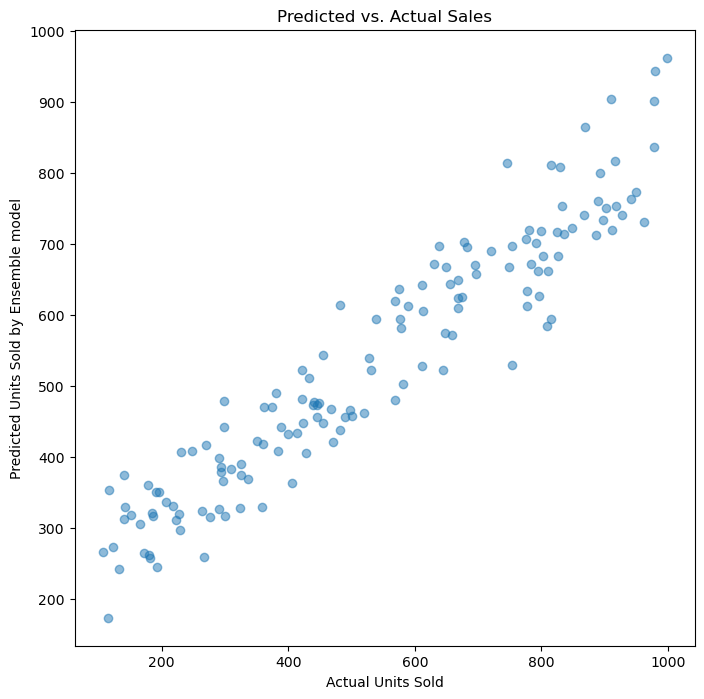

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Scatter plot of predicted vs. actual sales
plt.figure(figsize=(8, 8))
plt.scatter(val_data_h[target], ensemble_predictions, alpha=0.5)
plt.xlabel('Actual Units Sold')
plt.ylabel('Predicted Units Sold by Ensemble model')
plt.title('Predicted vs. Actual Sales')
plt.show()


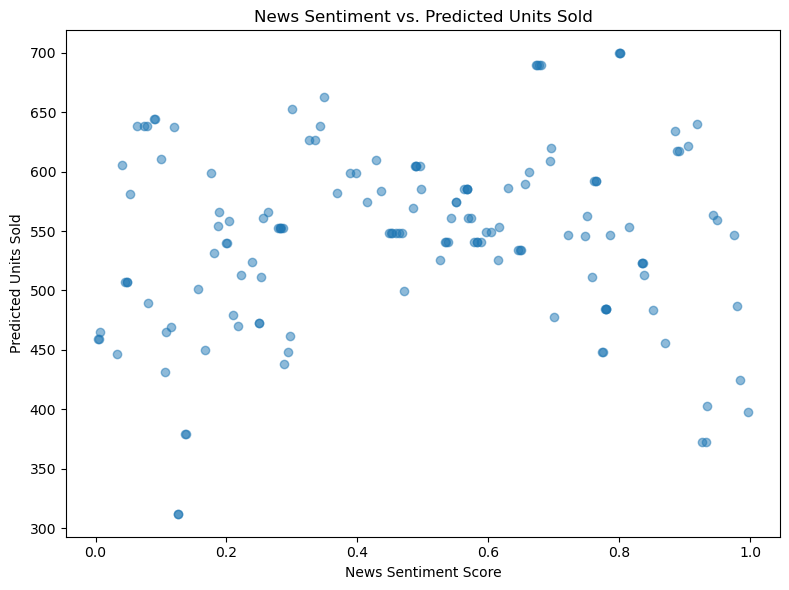

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(val_data_nlp['sentiment_score'], nlp_predictions, alpha=0.5)
plt.xlabel('News Sentiment Score')
plt.ylabel('Predicted Units Sold')
plt.title('News Sentiment vs. Predicted Units Sold')
plt.tight_layout()
plt.show()


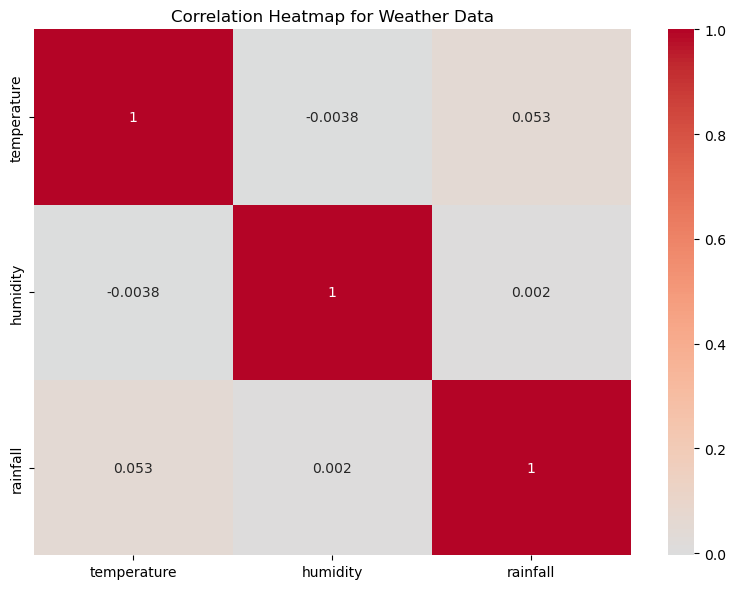

In [30]:
import seaborn as sns

weather_corr = train_data_wd[['temperature', 'humidity', 'rainfall']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(weather_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap for Weather Data')
plt.tight_layout()
plt.show()


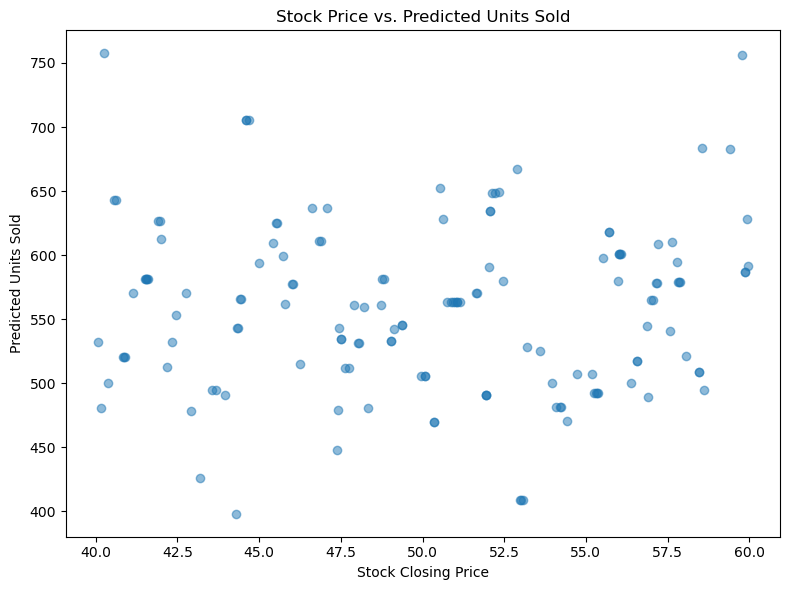

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(val_data_sp['closing_price'], stock_price_predictions, alpha=0.5)
plt.xlabel('Stock Closing Price')
plt.ylabel('Predicted Units Sold')
plt.title('Stock Price vs. Predicted Units Sold')
plt.tight_layout()
plt.show()


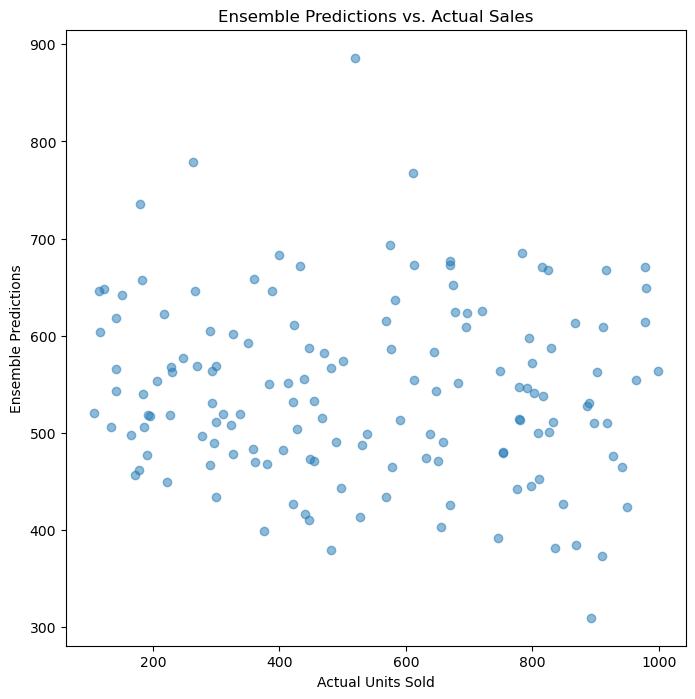

In [32]:
plt.figure(figsize=(8, 8))
plt.scatter(val_data_h[target], population_predictions, alpha=0.5)
plt.xlabel('Actual Units Sold')
plt.ylabel('Ensemble Predictions')
plt.title('Ensemble Predictions vs. Actual Sales')
plt.show()


# **Predicting the Sale for a Particular Day: Single Product**

> **Input Data to the Model**

In [33]:
# Given input features for prediction
humidity = 65.0
temperature = 25.0
sentiment_score = 0.8
geography = 'Hilly'
closing_price = 55.0
rainfall = 2.345
feedback = 'positive'
urban = 0.509
rural = 0.491


> **Function for Mapping the Input into the Trained Model**

In [34]:

def predict_sales(humidity,temperature, rainfall, news, geography, stock, feedback, pop_urban, pop_rural ):
    if geography=='Hilly':
        g_encoded = np.array([1])
    elif geography=='Grassland':
        g_encoded =  np.array([0])
    else:
        g_encoded =  np.array([2])
    
    
    if feedback=='Negative':
        f_encoded=  np.array([0])
    elif feedback=='Positive':
        f_encoded =  np.array([2])
    else :
        f_encoded =  np.array([1])   
        
        
    hum =  np.array([humidity, temperature, rainfall])
    sc =  np.array([news])
    sp =  np.array([stock])
    urb =  np.array([pop_urban,pop_rural])
    
    input_data = np.array([[nlp_model.predict(sc)[0], wd_model.predict(hum)[0],
                            pop_model.predict(urb)[0], geo_model.predict(g_encoded)[0], 
                            sp_model.predict(sp)[0], fd_model.predict(f_encoded)[0]]])

    # Make prediction using the ensemble model
    sales = ensemble_model.predict(input_data)[0]
    
    return sales



> **Predicting the Final Output**

In [35]:
#Initial Inventory value, in units
inventory = 300

# Prdicting the sales amount
units= predict_sales(humidity,temperature, rainfall, sentiment_score, geography, closing_price, feedback, urban, rural )
new_units = math.floor(units)

print(f"Product_Id- WM_201 \nProduct: Soda \n: Current Stock: {inventory} units \nRequired Stock: {new_units} units")

percent=math.floor(inventory/new_units*100)

if percent>0:
    print(f"Increase by {percent}%")
else:
    print(f"Decrease by {percent}%")

Product_Id- WM_201 
Product: Soda 
: Current Stock: 300 units 
Required Stock: 539 units
Increase by 55%


# **Integrating the Model with Backend**

In [37]:
import joblib
joblib.dump(ensemble_model, 'model.pkl')


['model.pkl']

In [ ]:
from flask import Flask, request, jsonify
import os
import joblib

app = Flask(__name__)

model = joblib.load('model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.json
        features = data['features']
        prediction = model.predict(features)

        response = {
            'prediction': prediction.tolist(),
            'message': 'Prediction successful'
        }

        return jsonify(response), 200

    except Exception as e:
        error_response = {
            'error': 'An error occurred',
            'message': str(e)
        }
        return jsonify(error_response), 500

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=int(os.environ.get('PORT', 5000)))


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on all addresses.
 * Running on http://192.168.1.50:5000/ (Press CTRL+C to quit)
